In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [23]:
path = "../data/"

rst = pd.read_csv(path + "restaurant.csv", encoding='utf-8-sig')
menu = pd.read_csv(path + "menu.csv", encoding='utf-8-sig')
rev = pd.read_csv(path + "review.csv", encoding='utf-8-sig')

In [4]:
rst.head(5)

,restaurant_id,address,name,opening_hours,phone,type,category,lat,lng,review_count,created_at,updated_at,summary
0,0,서울 광진구 광장로 58-1 1층,범가,[],010-3627-7041,0,중식당,NaN,NaN,NaN,NaN,NaN,NaN
1,1,서울 광진구 워커힐로 177 워커힐 호텔앤리조트,비스타 워커힐 서울 피자힐,[],02-6330-9020,0,피자,NaN,NaN,NaN,NaN,NaN,NaN
2,2,서울 광진구 워커힐로 177 비스타 워커힐 서울 1층,비스타 워커힐 서울 더뷔페,[],02-6330-9015,0,뷔페,NaN,NaN,NaN,NaN,NaN,NaN
3,3,서울 광진구 워커힐로 177 워커힐 호텔앤리조트,비스타 워커힐 서울 명월관,[],02-6330-9050,0,"육류,고기요리",NaN,NaN,NaN,NaN,NaN,NaN
4,4,서울 광진구 광장로1나길 10,어울림,"['화 11:00 - 21:00 20:30 라스트오더', '수 11:00 - 21:...",0507-1306-1470,0,"해물,생선요리",NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
rst.category.unique()

array(['중식당', '피자', '뷔페', '육류,고기요리', '해물,생선요리', '냉면', '떡볶이', '찌개,전골',
       '한식', '일식당', '채식,샐러드뷔페', '순대,순댓국', '곰탕,설렁탕', '양식', '이탈리아음식', '햄버거',
       '복어요리', '초밥,롤', '샤브샤브', '국수', '닭요리', '분식', '우동,소바', '돼지고기구이',
       '백숙,삼계탕', '두부요리', '종합분식', '칼국수,만두', '정육식당', '치킨,닭강정', '전,빈대떡',
       '33떡볶이', '다이어트,샐러드', '죽', '오리요리', '토스트', '족발,보쌈', '베트남음식', '소고기구이',
       '멕시코,남미음식', '낙지요리', '곱창,막창,양', '김밥', '만두', '양갈비', '감자탕', '돈가스',
       '추어탕', '샌드위치', '닭볶음탕', '덮밥', '찜닭', '밀키트', '생선구이', '푸드트럭', '양꼬치',
       '보리밥', '갈비탕', '이북음식', '닭발', '스파게티,파스타전문', '조개요리', '패밀리레스토랑',
       '독일음식', '한정식-일반', '아시아음식', '아귀찜,해물찜', '닭갈비', '일본식라면', '태국음식',
       '생선회', '막국수', '주꾸미요리', '장어,먹장어요리', '국밥', '마라탕', '호떡', '핫도그',
       '딤섬,중식만두', '카레', '백반,가정식', '해장국', '밀크밥버거', '퓨전음식', '도시락,컵밥',
       '터키음식', '신의주부대찌개', '야식', '푸드코트', '일식,초밥뷔페', '기사식당', '인도음식',
       '프랑스음식', '비빔밥', '게요리', '굴요리', '매운탕,해물탕', '스테이크,립', '일식튀김,꼬치',
       '베이글', '갤러리카페', '베이커리', '카페', '카페,디저트', '브런치', '아이스크림', '도넛',
       '북카페', '호두과자'

In [24]:
menu = menu[['menu_id', 'price', 'restaurant_id']]
menu.head(5)

,menu_id,price,restaurant_id
0,0,45000,4
1,1,45000,4
2,2,10000,4
3,3,9000,4
4,4,9000,4


In [30]:
rev.head(5)

,review_id,created_at,user_id,restaurant_id,content,updated_at
0,0,4.2.화,0,0,✨마늘후레이크 찹쌀탕수육 맛보러 가야하는 범가 ✨ 지인이 여기 탕수육 맛있다고 해서...,NaN
1,1,3.11.월,1,0,광나루역맛집 범가에서 마늘찹쌀탕수육 해물짬뽕 해물짜장 먹고 왔어요! 양도 정말 푸짐...,NaN
2,2,2.9.금,2,0,<스티브 추천> 마늘 후레이크 탕수육이 유명하죠. 근데 이번에 알았어요. 여기 ...,NaN
3,3,2.23.금,3,0,찐 동네 줄서는 맛집~ 오픈때부터 다니다가 최근에 바빠서 가기가 힘들어 꽤 오랫만...,NaN
4,4,4.9.화,4,0,"마늘탕수육, 자장면, 짬뽕 모두 다 맛있어요~~ 양도 푸짐해서 배불리먹었습니다. 네...",NaN


### 데이터 전처리

카테고리 별로 해줄 필요

In [26]:
# 0: 음식점, 1:카페, 2:술집
rst_0 = rst[rst.type == 0]
rst_1 = rst[rst.type == 1]
rst_2 = rst[rst.type == 2]

rst_0_ids = list(rst_0['restaurant_id'])
rst_1_ids = list(rst_1['restaurant_id'])
rst_2_ids = list(rst_2['restaurant_id'])

menu_0 = menu[menu['restaurant_id'].isin(rst_0_ids)]
menu_1 = menu[menu['restaurant_id'].isin(rst_1_ids)]
menu_2 = menu[menu['restaurant_id'].isin(rst_2_ids)]

In [28]:
menu_2

,menu_id,price,restaurant_id
20100,20254,38000,2460
20101,20255,22000,2460
20102,20256,28000,2460
20103,20257,24000,2460
20104,20258,22000,2460
...,...,...,...
24927,25126,18000,3149
24928,25127,18000,3149
24929,25128,18000,3149
24930,25129,18000,3149


In [49]:
# Group by restaurant_id and calculate the mean of price for each group
average_price_by_restaurant = menu_0.groupby('restaurant_id')['price'].mean()

# 0~1로 스케일링
# scaler = MinMaxScaler()
# tmp = scaler.fit_transform(average_price_by_restaurant.values.reshape(-1,1))

# 평균0, 분산1로 표준화. 벡터를 사용할거면 이게 더 나을 듯
standard_scaler = StandardScaler()
menu_0_avg_std = standard_scaler.fit_transform(average_price_by_restaurant.values.reshape(-1,1))

print(average_price_by_restaurant)

restaurant_id
4        17555.555556
5       308333.333333
6        13909.090909
8         9615.384615
9        12333.333333
            ...      
1220      9714.285714
1221      8860.000000
1222     21875.000000
1224     25860.000000
1225     30454.545455
Name: price, Length: 925, dtype: float64


In [51]:
menu_0_avg_std = pd.DataFrame(menu_0_avg_std,
                              index = average_price_by_restaurant.index,
                              columns = ['avg_price_std'])

In [52]:
# 해당 데이터프레임에 feature 추가해가며 클러스터링 해 볼 예정

menu_0_avg_std

,avg_price_std
restaurant_id,
4,-0.165104
5,16.764020
6,-0.377401
8,-0.627381
9,-0.469142
...,...
1220,-0.621623
1221,-0.671360
1222,0.086375


### 클러스터링

실루엣 다이어그램.  
여기 보고 최적의 클러스터 개수 찾아서 k-means의 k 파라미터로 사용

In [55]:
# 실루엣 다이어그램 함수

def visualize_silhouette(cluster_lists, X_features):

    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    import numpy as np

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=42)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        # axs[ind].set_ylim([0, len(sil_values) + 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

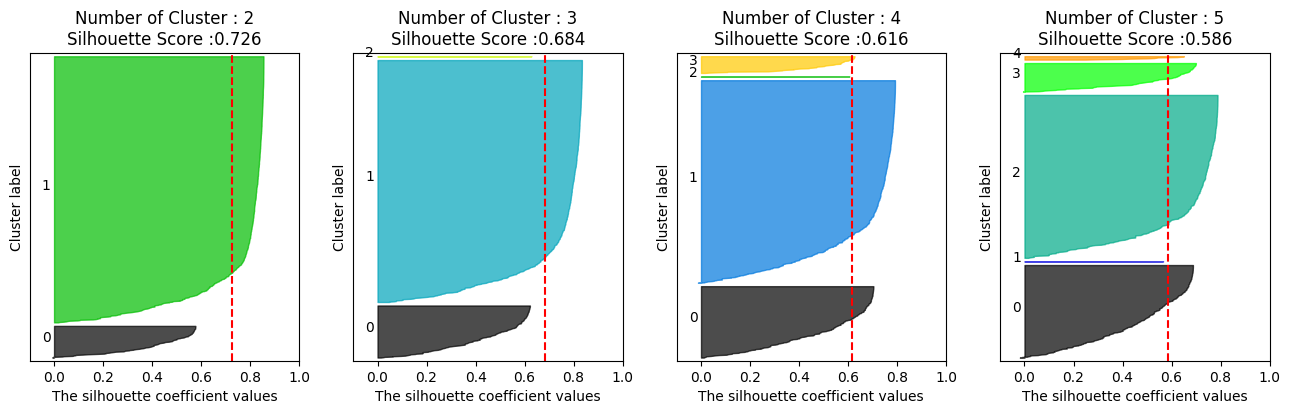

In [56]:
visualize_silhouette([2,3,4,5], menu_0_avg_std)

클러스터링

In [57]:
from sklearn.cluster import KMeans

# 예시
clusterer = KMeans(n_clusters = 3, max_iter=500, random_state=0)
cluster_labels = clusterer.fit_predict(menu_0_avg_std)

c:\Users\MOONSOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


시각화

In [ ]:
from sklearn.manifold import TSNE

# 여기서는 의미x. 애초에 변수가 지금 하나밖에 없음음
tsne = TSNE(n_components=2)
menu_0_avg_std_2dim = tsne.fit_transform(menu_0_avg_std)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# x, y에 들어갈 데이터 이름 수정 필요
palette = sns.color_palette("bright", 3)
sns.scatterplot(x=transformed_pca[:,0], y=transformed_pca[:,1], hue = cluster_labels, legend='full', palette=palette)
plt.show()